### HW6- Albedo feedback

In [35]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [36]:
# Given Formula:
#α(T)= αi for T<= Ti
#α(T)= α0 + (αi-α0)* ((T-T0)**2/(Ti-T0)**2) for Ti<T<T0
#α(T)= α0 for T=> T0

#### Part (a)

In [37]:
def calculate_albedo(T):
    # Constants
    α_0 = 0.289
    α_i = 0.7
    T_0 = 293
    T_i = 260

    # Albedo calculation based on temperature conditions
    if T <= T_i:
        return α_i
    elif T_i < T < T_0:
        return α_0 + (α_i - α_0) * ((T - T_0) ** 2 / (T_i - T_0) ** 2)
    else:
        return α_0

In [38]:
calculate_albedo(250)

0.7

In [39]:
calculate_albedo(275)

0.41128099173553717

In [40]:
calculate_albedo(300)

0.289

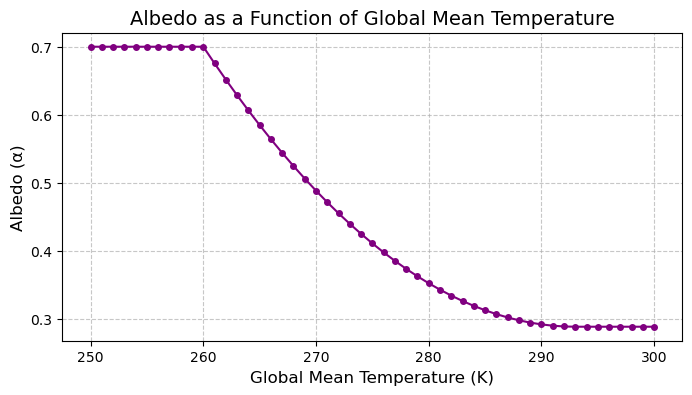

In [83]:
temperatures = np.arange(250, 301, 1)

albedos = [calculate_albedo(T) for T in temperatures]


plt.figure(figsize=(8, 4))
plt.plot(temperatures, albedos, color='purple', marker='o', linestyle='-', markersize=4)

plt.xlabel("Global Mean Temperature (K)", fontsize=12)
plt.ylabel("Albedo (α)", fontsize=12)
plt.title("Albedo as a Function of Global Mean Temperature", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

#### Part (b)

In [84]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [85]:
solarconstant = 1366 #W/m2
epsilon = 0.8
stefanboltzman = 5.670374419e-8 #W/m2/K4
heatcapacity = 4.0e8 #J/m2/K
α_0 = 0.289
α_i = 0.7
T_0 = 293
T_i = 260

In [86]:
M = 2 
#u[0] is Ta
#u[1] is Ts

def myfun( t, u): 
    f = np.zeros((M,))
    f[0] = (solarconstant * (1-calculate_albedo(u[1]))/4 - epsilon*stefanboltzman*(u[0]**4) 
            - (1-epsilon)*stefanboltzman*(u[1]**4))/heatcapacity
    f[1] = (solarconstant * (1-calculate_albedo(u[1]))/4 + epsilon*stefanboltzman*(u[0]**4) - 
            stefanboltzman*(u[1]**4))/heatcapacity
    return f

In [87]:
# initial conditions
#u0 = np.zeros((M))
u0 = [262,292]

Dt = 60*60*365*24
t0 = 0
tmax = 100*Dt
t = np.arange(t0, tmax, Dt)

In [88]:
solution = solve_ivp(myfun, [t0, tmax], u0, method='RK45', t_eval=t)

In [89]:
equilibrium_temperature = solution.y[1][-1]
print(f"Equilibrium surface temperature: {equilibrium_temperature:.2f} K")

Equilibrium surface temperature: 290.51 K


In [81]:
total_warmimg= equilibrium_temperature- 288.3280 #the asnwer from class
print(f"Average of total warmimg of surface temperature: {total_warmimg:.2f} K")

Average of total warmimg of surface temperature: 2.18 K
